# Open and read data

In [1]:
sm_vp,sm_fp,sm_fn,md_vp,md_fp,md_fn,fn_create,vp_create,fp_create,total = [],[],[],[],[],[],[],[],[],[]

def ouvrir(filename):
    data = []
    with open(filename,"r",encoding = "utf-8") as f:
        g = f.readline().strip()
        data.append(g)
        while g!='':
            g = f.readline().strip()
            data.append(g)
    data = [x.split('|') for x in data]
    data.pop(-1)
    return data

def find_ner_label(data):
    return [[x[0],x[3]] for x in data]

def find_ner_label_stanford(data):
    return [[x[0],x[1]] for x in data]

def classifier(data):
    loc,per,org,misc = list(filter(lambda x:"LOC" in x[1].upper(),data)),list(filter(lambda x:"PER" in x[1].upper(),data)),list(filter(lambda x:"ORG" in x[1].upper(),data)),list(filter(lambda x:"MISC" in x[1].upper() or 'time' in x[1] or "prod" in x[1],data))
    return [loc,per,org,misc]




sm_vp_ner = find_ner_label(ouvrir("vp_sm.txt"))
md_vp_ner = find_ner_label(ouvrir("vp_md.txt"))
create_vp_ner = find_ner_label(ouvrir("vp_create.txt"))
total_ner = find_ner_label(ouvrir("total.txt"))

sm_class,md_class,create_class = classifier(sm_vp_ner),classifier(md_vp_ner),classifier(create_vp_ner)
sm_loc,sm_per,sm_org,sm_misc = sm_class[0],sm_class[1],sm_class[2],sm_class[3]
md_loc,md_per,md_org,md_misc = md_class[0],md_class[1],md_class[2],md_class[3]
create_loc,create_per,create_org,create_misc = create_class[0],create_class[1],create_class[2],create_class[3]

total_class = classifier(total_ner)
total_loc,total_per,total_org,total_misc = total_class[0],total_class[1],total_class[2],total_class[3]
print(len(sm_vp_ner)," ",len(md_vp_ner)," ",len(create_vp_ner)," ",len(total_ner),len(total_loc))

stanford_vp_ner = find_ner_label_stanford(ouvrir("Stanford_vp.txt"))
stanford_fp_ner = find_ner_label_stanford(ouvrir("Stanford_fp.txt"))
stanford_fn_ner = find_ner_label_stanford(ouvrir("Stanford_fn.txt"))

print(len(stanford_vp_ner)," ",len(stanford_fp_ner)," ",len(stanford_fn_ner))

stanford = classifier(stanford_vp_ner)
stanford_loc,stanford_per,stanford_org,stanford_misc = stanford[0],stanford[1],stanford[2],stanford[3]
print(len(stanford_loc)," ",len(stanford_org)," ",len(stanford_per),' ',len(stanford_misc))

608   642   483   1349 648
522   128   653
351   32   124   15


In [31]:
l = []
for x in stanford_vp_ner:
    if x[0].count(" ")>=1:
        tmp = x[0].split(" ")
        for y in tmp:
            l.append([y,x[1]])
    else:
        l.append(x)
stanford_vp_ner = l
print(len(stanford_vp_ner))

588


In [43]:
stanford_per[0]

['Prinzen', 'PER']

# Visualisation

In [5]:
import matplotlib.pyplot as plt
from upsetplot import generate_counts
from upsetplot import plot
from matplotlib import pyplot

# 1. Situation Globale

### Combien d' entités nommées ont été bien trouvées par tous les 3 systèmes?

<BarContainer object of 2 artists>

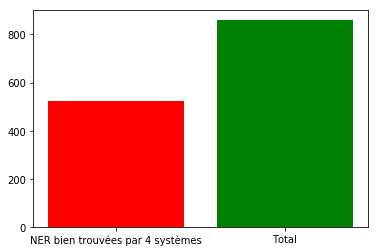

In [6]:
l1 = [x[0] for x in sm_vp_ner]
l2 = [x[0] for x in md_vp_ner]
l3 = [x[0] for x in create_vp_ner]
l4 = [x[0] for x in stanford_vp_ner]
total = [x[0] for x in total_ner]

import collections
from collections import Counter

trouver = l1+l2+l3+l4


plt.bar(range(2),[len(set(trouver)),len(set(total))],color = 'rg',tick_label=["NER bien trouvées par 4 systèmes","Total"])

In [23]:
print(stanford)

Counter({'Zürich': 29, 'Hr': 25, 'Schweiz': 17, 'Deutschland': 12, 'London': 9, 'Basel': 9, 'Hrn': 8, 'Dr': 8, 'Berlin': 8, 'Oesterreich': 8, 'Westmüchte': 8, 'Rußland': 7, 'Gott': 6, 'Prag': 6, 'Moskau': 6, 'Preußen': 5, 'St': 5, 'Oberst': 5, 'General': 4, 'Frankreich': 4, 'England': 4, 'Luzern': 4, 'Belgien': 4, 'Paris': 4, 'Havas': 4, 'Konstantinopel': 4, 'Wien': 4, 'Zürichs': 4, 'Petersburg': 3, 'Spanien': 3, 'Rußlands': 3, 'Kanton': 3, 'Neuenburg': 3, 'Bern': 3, 'Prof': 3, 'Lausanne': 3, 'Emmenbrücke': 3, 'Rulland': 3, 'Haag': 2, 'Brüssel': 2, 'Sevilla': 2, 'Bucharest': 2, 'New': 2, 'Amerika': 2, 'Rom': 2, 'Englands': 2, 'Ostschweiz': 2, 'Liberté': 2, 'Freiburg': 2, 'Bundesversammlung': 2, 'Kantons': 2, 'Bundesrath': 2, 'Herr': 2, 'Flers': 2, 'Budapest': 2, 'Bundesrat': 2, 'Vereinigten': 2, 'Italien': 2, 'Deutschlands': 2, 'Berlins': 2, 'Westmächten': 2, 'Rulsland': 2, 'Westdeutschland': 2, 'im': 2, 'Kairo': 2, 'Neumarkte': 2, 'Erzherzogs': 2, 'Friedrich': 2, 'Westunion': 2, 'Pole

### Intersection create et sm?

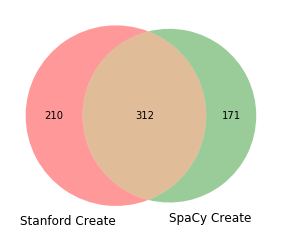

In [7]:
def Venn_d2(s1,s2,n1,n2):
    import matplotlib.pyplot as plt
    venn2([s1,s2],set_labels=([n1,n2]))
    plt.savefig("Intersection.pdf")
import collections
from collections import Counter

sm,md,create,stanford,total = Counter(l1),Counter(l2),Counter(l3),Counter(l4),Counter(total)

import matplotlib_venn
from matplotlib_venn import venn2

venn2([stanford,create],set_labels=(["Stanford Create","SpaCy Create"]))

### Intersection sm et md?

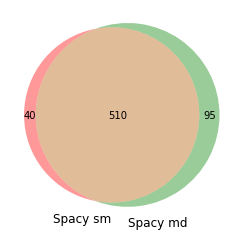

In [5]:
Venn_d2(sm,md,"Spacy sm","Spacy md")

### Intersection md et create

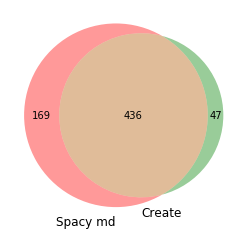

In [6]:
Venn_d2(md,create,"Spacy md","Create")

### Intersection sm + md et create

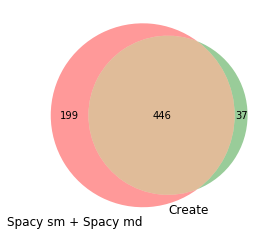

In [7]:
Venn_d2(sm | md,create,"Spacy sm + Spacy md","Create")

### Intersection sm + md + create vs total

# 2. Pour chaque étiquette

 

In [9]:
def comparer(data,total,nom,label1,label2):
    name = ["LOC","PER","ORG","MISC"]

    x =list(range(len(name)))
    sm_loc,sm_per,sm_org,sm_misc = data[0],data[1],data[2],data[3]
    total_loc,total_per,total_org,total_misc = total[0],total[1],total[2],total[3] 
    l1 = [len(sm_loc),len(sm_per),len(sm_org),len(sm_misc)]
    l2 = [len(total_loc),len(total_per),len(total_org),len(total_misc)]
    print("{} le nombre de VRAI POSITIF pour chaque étiquette".format(nom))
    f = plt.figure()
    plt.bar(x,l1,0.4,label = "{} :  Vrai positif".format(label1),fc = 'y')
    for i in range(len(name)):
        x[i] = x[i]+0.4
    plt.bar(x,l2,0.4,label = "{} :  Vrai positif".format(label2),tick_label = name,fc = 'r')
    plt.legend()
    plt.show()  
    f.savefig("{}.pdf".format(nom),bbox_inches='tight')

#comparer([sm_loc,sm_per,sm_org,sm_misc],[total_loc,total_per,total_org,total_misc],"Spacy sm")

### SM+train

Spacy sm le nombre de VRAI POSITIF pour chaque étiquette


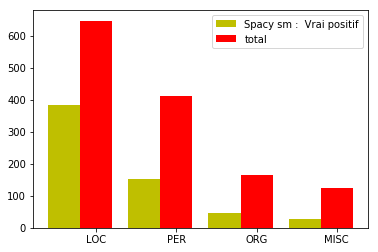

In [5]:
comparer([sm_loc,sm_per,sm_org,sm_misc],[total_loc,total_per,total_org,total_misc],"Spacy sm","Spacy sm","total")

### MD+train

Spacy md le nombre de VRAI POSITIF pour chaque étiquette


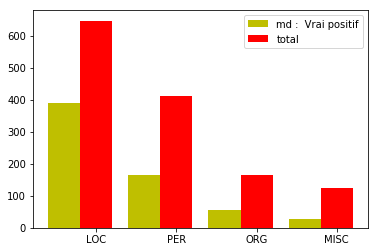

In [6]:
comparer([md_loc,md_per,md_org,md_misc],[total_loc,total_per,total_org,total_misc],"Spacy md","md","total")

### Create 

Spacy sm le nombre de VRAI POSITIF pour chaque étiquette


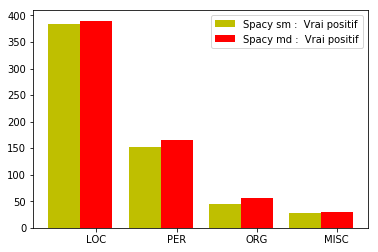

In [10]:
comparer([sm_loc,sm_per,sm_org,sm_misc],[md_loc,md_per,md_org,md_misc],"Spacy sm","Spacy sm","Spacy md")

In [ ]:
comparer([create_loc,create_per,create_org,create_misc],[total_loc,total_per,total_org,total_misc],"Create","create","total")

Amélioration sur tous les types d'entités 

Ajouter les chiffres sur le diagramme

En proportion, 

MISC, 

In [42]:
category = subSet([],["spaCy sm","spaCy md","spaCy Create","Stanford Create"],[])
category.sort(key=lambda x:len(x))
category

[['spaCy sm'],
 ['spaCy md'],
 ['spaCy Create'],
 ['Stanford Create'],
 ['spaCy sm', 'spaCy md'],
 ['spaCy sm', 'spaCy Create'],
 ['spaCy sm', 'Stanford Create'],
 ['spaCy md', 'spaCy Create'],
 ['spaCy md', 'Stanford Create'],
 ['spaCy Create', 'Stanford Create'],
 ['spaCy sm', 'spaCy md', 'spaCy Create'],
 ['spaCy sm', 'spaCy md', 'Stanford Create'],
 ['spaCy sm', 'spaCy Create', 'Stanford Create'],
 ['spaCy md', 'spaCy Create', 'Stanford Create'],
 ['spaCy sm', 'spaCy md', 'spaCy Create', 'Stanford Create']]

# Pour chaque étiquette, quelle est l'intersection pour ces 3 systèmes? Spéparément, quel système est le meilleur?



In [75]:
def best(sm_org,md_org,create_org,name):
    sm_vp_org_ner = sm_org
    md_vp_org_ner = md_org
    create_vp_org_ner = create_org
    from collections import Counter
    l1,l2,l3 = sm_org,md_org,create_org
    data = [len(l1),len(l2),len(l3),intersection2(l1,l2),intersection2(l1,l3),intersection2(l2,l3),intersection3(l1,l2,l3)]
    category = subSet([],["Spacy sm","Spacy md","Create"],[])
    category.sort(key=lambda x:len(x))
    
    can1 = "Spacy sm "+name
    can2 = "Spacy md "+name
    can3 = "create "+name

    from upsetplot import from_memberships
    contents = from_memberships(category,data)
    f = plt.figure()
    plot(contents,show_counts="%d",fig=f)
    plt.suptitle("Situation of each system and intersection for {}?".format(name))
    plt.show()
    f.savefig("{}.pdf".format(name))
    
def best1(sm_org,md_org,create_org,stanford,name):
    sm_vp_org_ner = sm_org
    md_vp_org_ner = md_org
    create_vp_org_ner = create_org
    from collections import Counter
    l1,l2,l3 = sm_org,md_org,create_org
    l4 = stanford
    data = [len(l1),len(l2),len(l3),len(l4),intersection2(l1,l2),intersection2(l1,l3),intersection2(l1,l4),intersection2(l2,l3),intersection2(l2,l4),intersection2(l3,l4),intersection3(l1,l2,l3)
           ,intersection3(l1,l2,l4),intersection3(l1,l3,l4),intersection3(l2,l3,l4),intersection4(l1,l2,l3,l4)]
    category = subSet([],["Spacy sm","Spacy md","spaCy Create","Stanford Create"],[])
    category.sort(key=lambda x:len(x))
    
    can1 = "spaCy sm "+name
    can2 = "spaCy md "+name
    can3 = "spaCy Create "+name
    can4 = "Stanford Create"+name

    from upsetplot import from_memberships
    contents = from_memberships(category,data)
    f = plt.figure()
    plot(contents,show_counts="%d",fig=f)
    plt.suptitle("Situation of each system and intersection for {}?".format(name))
    plt.show()
    f.savefig("{}.pdf".format(name))
    
 
'''
def subSet()
itertools of category name

input:
can1
can2
can3

output:
can1
can2
can3
can1 can2
can1 can3
can2 can3
can1 can2 can3

'''
def subSet(cur,choice,res):
    for i in range(len(choice)):    
        cur.append(choice[i])
        if cur not in res:
            res.append([x for x in cur])
        subSet(cur,choice[i+1:],res)
        cur.pop(-1)
    return res

def intersection2(a,b):
    from collections import Counter
    c1,c2 = Counter(a),Counter(b)
    intersection = set(a) & set(b)
    stats = 0
    for x in intersection:
        stats += min(c1[x],c2[x])
    return stats 

def intersection3(a,b,c):
    from collections import Counter
    c1,c2,c3 = Counter(a),Counter(b),Counter(c)
    intersection = set(a)&set(b)&set(c)
    stats = 0
    for x in intersection:
        stats += min(c1[x],c2[x],c3[x])
    return stats

def intersection4(a,b,c,d):
    from collections import Counter
    c1,c2,c3,c4 = Counter(a),Counter(b),Counter(c),Counter(d)
    intersection = set(a)&set(b)&set(c)&set(d)
    stats = 0
    for x in intersection:
        stats += min(c1[x],c2[x],c3[x],c4[x])
    return stats  
    
def complementary2(s1,s2,name,lab1,lab2): 
    c1,c2 = Counter(s1),Counter(s2)
    com1,com2 = set(s1) -set(s2),set(s2)-set(s1)
    s1_com,s2_com = len(com1),len(com2)
    
    data = [s1_com,s2_com]
    category = [[lab1],[lab2]]
    from upsetplot import from_memberships
    contents = from_memberships(category,data)

    plot(contents,show_counts="%d")
    plt.suptitle("The size of complementary for {}".format(name))
    plt.show()
    
    print(lab1," n'a pas trouvé : ")
    for x in com2:
        print(x)
    print()
    print(lab2," n'a pas trouvé : ")
    for x in com1:
        print(x)
   
    

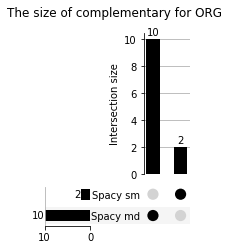

Spacy sm  n'a pas trouvé : 
Westunion
ViermüchteKontrolle
Vereinigten
Celanaise
Kunstgewerbeschule
Eidgenössischen
Firma
Nahas
Sandistische
Brüsseler

Spacy md  n'a pas trouvé : 
DNS
OltenerKomitee


In [76]:
complementary2([x[0] for x in sm_org],[x[0] for x in md_org],"ORG","Spacy sm","Spacy md")

# ORG

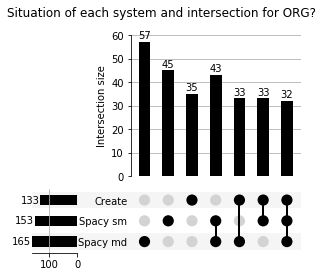

In [19]:
best([x[0] for x in sm_org],[x[0] for x in md_org],[x[0] for x in create_org],"ORG")

### Ecrire dans le rapport

### 3 points dans le rapport

### Quand l'intersection est trop grande, montrer les 2 étape par étape, [1,2,3,4] 1,2 1,3 1,4 2,4 3,4

### Complementary for ORG

### On regarde après pour le raffinement en ajoutant les entités nommées

### On a plus de faux négatifs pour tous les systèmes, on analyse en détail pour chaque sysème sur le plan de faux négatifs, si un indice est "anormal", on l'analyse par visualisation plus profonde. 

### spacy

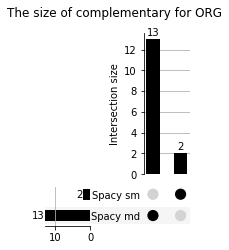

ValueError: arrays must all be same length

In [61]:
complementary2([x[0] for x in sm_org],[x[0] for x in md_org],"ORG","Spacy sm","Spacy md")

In [ ]:
set(sm_org) & 

[['Spacy sm + train'], ['Create ']]   [5, 4]


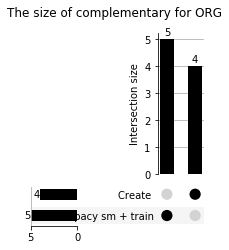

In [58]:
complementary([x[0] for x in sm_org],[x[0] for x in create_org],"ORG","Spacy sm + train","Create ")

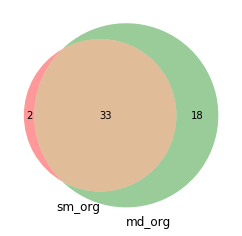

In [59]:
venn2([Counter([x[0] for x in sm_org]),Counter([x[0] for x in md_org])],set_labels=["sm_org","md_org"])

### 

# PER

sm :  145  md :  167  create :  109


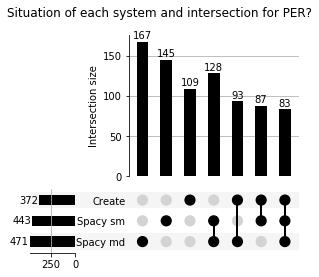

In [27]:
best([x[0] for x in sm_per],[x[0] for x in md_per],[x[0] for x in create_per],"PER")


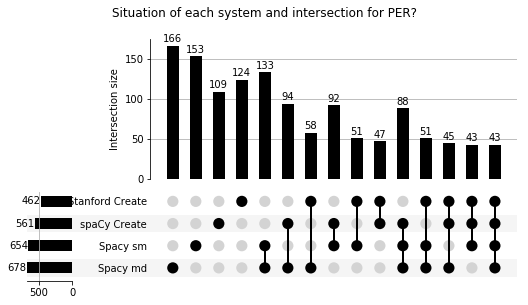

In [50]:
best1([x[0] for x in sm_per],[x[0] for x in md_per],[x[0] for x in create_per],[x[0] for x in stanford_per],"PER")

L'intersection entre les systèmes eux-mêmes pour retrouver ce qui est commun dans les systèmes

### Référence vs (sm+md)

### vérifier la visualisation et 

### Complementary

[['Spacy sm + train'], ['Spacy md + train']]   [15, 37]


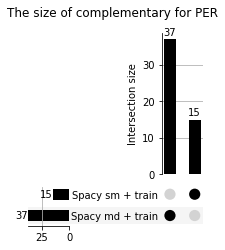

In [60]:
complementary(Counter([x[0] for x in sm_per]),Counter([x[0] for x in md_per]),"PER","Spacy sm + train","Spacy md + train")

[['Spacy sm + train'], ['Create']]   [49, 20]


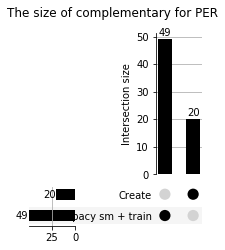

In [61]:
complementary(set([x[0] for x in sm_per]),set([x[0] for x in create_per]),"PER","Spacy sm + train","Create")

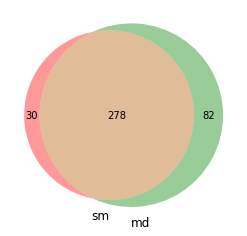

In [62]:
venn2([set(l1),set(l2)],set_labels=["sm","md"])

# LOC

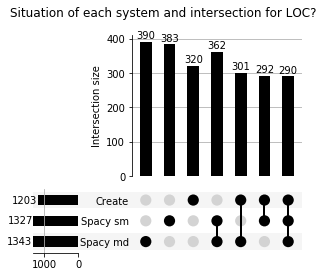

In [41]:
best([x[0] for x in sm_loc],[x[0] for x in md_loc],[x[0] for x in create_loc],"LOC")


### Complementary

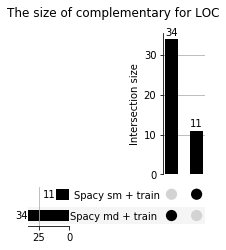

In [111]:
complementary(Counter([x[0] for x in sm_loc]),Counter([x[0] for x in md_loc]),"LOC","Spacy sm + train","Spacy md + train ")

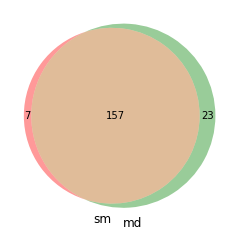

In [135]:
venn2([set(l1),set(l2)],set_labels=["sm","md"])

# MISC

sm :  28  md :  22  create :  19


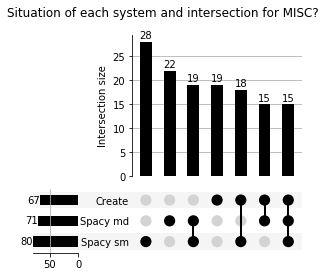

In [29]:
best([x[0] for x in sm_misc],[x[0] for x in md_misc],[x[0] for x in create_misc],"MISC")

### Complementary

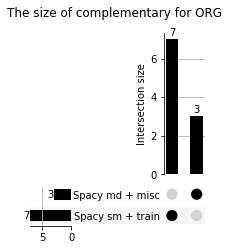

In [112]:
complementary(Counter([x[0] for x in sm_misc]),Counter([x[0] for x in md_misc]),"ORG","Spacy sm + train","Spacy md + misc")

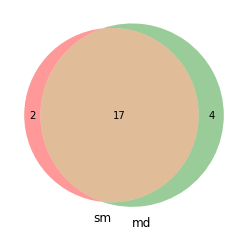

In [138]:
venn2([set(l1),set(l2)],set_labels=["sm","md"])

In [ ]:
import pandas as pd
pd.DataFrame({"Intersection":[x for x in list(set(l1) & set(l2))]})

### L'intersection est grande, montrer tous les éléments

### présenter le diagramme de Venn par citer tous les cas directement car la taille n'est pas grande...

### sm vs md

### sm vs create  md vs create

### sm + md vs total

### ajouter dans le rapport que ce n'est pas la priorité d'optimiser les paramètres...

### séparer les tâches plus détaillées. 

### le 3, 10 septembre
 
### mardi prochain répétition 3 slides 4 maximums

-- slide
-- visualisation

### jeudi : match de présentation en public

### factoriser pour faciliter les étapes en français...en anglais...

### factoriser tout le processus pour spacy, stanford....

### 1. factoriser le code ==> le corpus doit devenir une variable (ou au moins, on peut le modifier facilement)

### 2. présentation du 10 septembre ==> après la factorisation, il y a encore du temps pour la préparer après les réunions de la semaine prochaine.

### changer les chemins en chemin relatif 

### changer les chemins absolus en chemins relatifs